In [23]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data/headbrain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [25]:
# Store all head size and brain size to comput X and Y
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values


In [26]:
# Compute mean of X and mean of Y
mean_x = X.mean()
mean_y = Y.mean()
print(mean_x)
print(mean_y)


3633.9915611814345
1282.873417721519


#### Compute slope and coefficients according to OLS

In [27]:
'''
formula : E(x - xmean)(y - ymean) / E(x-xmean)^2
'''
a  = 0
b  = 0
for i in range(len(X)):
    a = a + (X[i] - mean_x) * (Y[i] - mean_y)
    b = b + (X[i] - mean_x) ** 2
s = a / b
c = mean_y - (s * mean_x)

print("slope: ", s)
print("coeficients: ", c)


slope:  0.26342933948939945
coeficients:  325.57342104944223


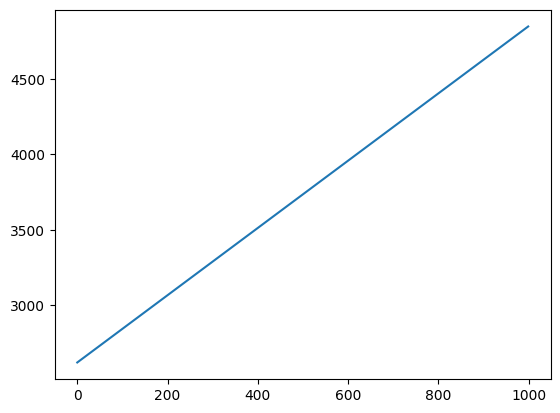

In [28]:
#line generated => y = 0.26342933948939945x + 325.57342104944223
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x_line = np.linspace(x_min, x_max, 1000)
plt.plot(x_line)

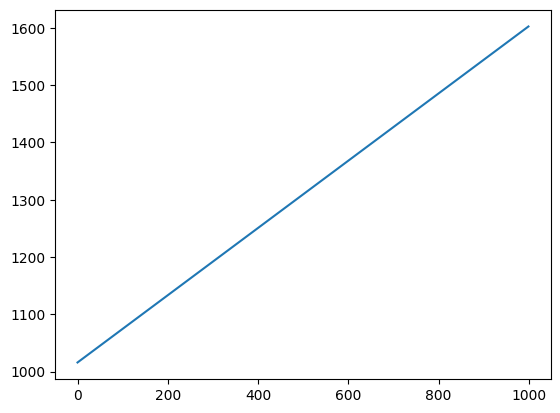

In [29]:
y_line = s * x_line + c
plt.plot(y_line)

#### Plot points (X,Y) and the regression line in one figure.

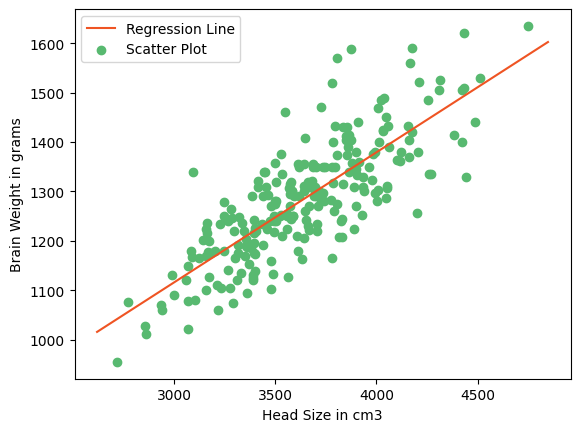

In [30]:
# Ploting Line
plt.plot(x_line, y_line, color='#ef5423', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, c='#58b970', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

#### Compute Root mean square error and $R^2$ square

In [31]:
#Compute Root mean square error 
rmse = 0
for i in range(len(X)):
    y_pred = c + s * X[i]    
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse / len(X))

print("Root mean square error:", rmse)

Root mean square error: 72.1206213783709


In [32]:
#Compute R2 square
ss_tot = 0
ss_res = 0
for i in range(len(X)):
    y_pred = c + s * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res / ss_tot)
print("R2 square:",r2)

R2 square: 0.6393117199570003
